In [ ]:
!wget https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip

--2021-08-29 10:34:59--  https://he-s3.s3.ap-southeast-1.amazonaws.com/media/hackathon/ia-for-ai/audio-files-6-757eba7a/dbb3bd26ead211eb.zip
Resolving he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)... 52.219.40.7
Connecting to he-s3.s3.ap-southeast-1.amazonaws.com (he-s3.s3.ap-southeast-1.amazonaws.com)|52.219.40.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 435471753 (415M) [application/zip]
Saving to: ‘dbb3bd26ead211eb.zip’

dbb3bd26ead211eb.zi 100%[===================>] 415.30M  12.4MB/s    in 35s     

2021-08-29 10:35:34 (12.0 MB/s) - ‘dbb3bd26ead211eb.zip’ saved [435471753/435471753]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dbb3bd26ead211eb.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import librosa, librosa.display

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
train = pd.read_csv('/content/dataset/train.csv')
test = pd.read_csv('/content/dataset/test.csv')

In [ ]:
train.head()

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral


In [ ]:
def change_speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
signal, sample_rate = librosa.load('/content/dataset/TrainAudioFiles/18777.mp3')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


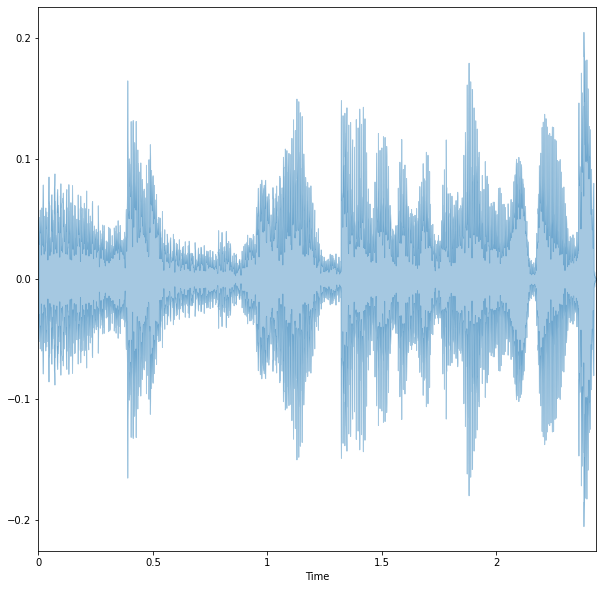

In [ ]:
plt.figure(figsize=(10,10))
librosa.display.waveplot(signal, sample_rate, alpha=0.4)

In [ ]:
signal2 = change_speed(signal, librosa.get_duration(y=signal, sr=sample_rate)/10)

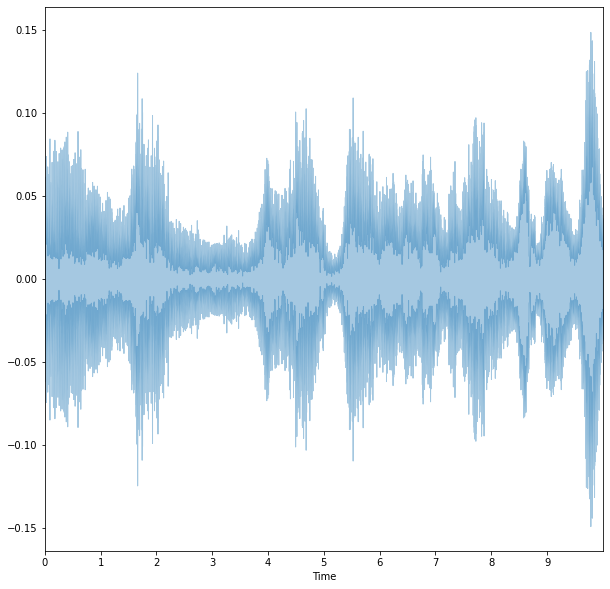

In [ ]:
plt.figure(figsize=(10,10))
librosa.display.waveplot(signal2, sample_rate, alpha=0.4)

In [ ]:
data = []
n_fft = 1024
hop_length = 256
for audio in train.filename:
    signal, sample_rate = librosa.load('/content/dataset/TrainAudioFiles/'+audio)
    duration = librosa.get_duration(y=signal, sr=sample_rate)

    if duration>10:
        signal2 = change_speed(signal, duration/10)
        MFCCs = librosa.feature.mfcc(signal2, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
        data.append(MFCCs)
    else:
        MFCCs = librosa.feature.mfcc(signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
        data.append(MFCCs)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

In [ ]:
def manipulate(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
signal, sample_rate = librosa.load('/content/dataset/TrainAudioFiles/18777.mp3', duration=7.5)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
signal

array([-0.01716111, -0.02797739, -0.0124542 , ...,  0.00013538,
       -0.00032802, -0.00023352], dtype=float32)

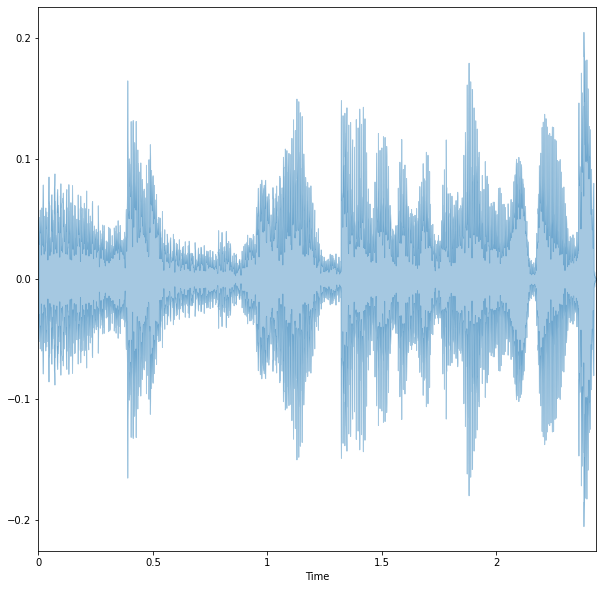

In [ ]:
plt.figure(figsize=(10,10))
librosa.display.waveplot(signal, sample_rate, alpha=0.4)

In [ ]:
manipulate(signal, sample_rate, 1.5)

array([-0.01736527, -0.02640869, -0.01005567, ...,  0.02588121,
        0.01794583,  0.0104871 ], dtype=float32)

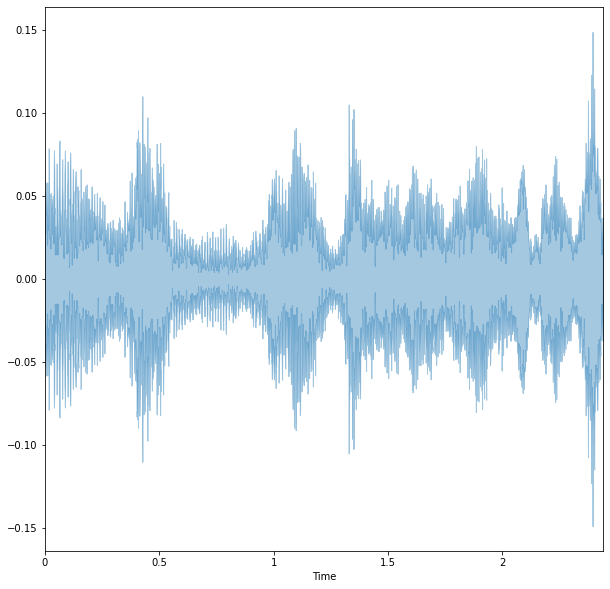

In [ ]:
plt.figure(figsize=(10,10))
librosa.display.waveplot(manipulate(signal, sample_rate, 1.5), sample_rate, alpha=0.4)

In [ ]:
pitchdata = []
n_fft = 2048
for audio in train.filename:
    signal, sample_rate = librosa.load('/content/dataset/TrainAudioFiles/'+audio)

    signal2 = manipulate(signal, sample_rate, 1.5)

    hop_length = signal2.shape[0]//999
    MFCCs = librosa.feature.mfcc(signal2, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
    pitchdata.append(MFCCs)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

In [ ]:
len(pitchdata)

5816

In [ ]:
testdata = []
n_fft = 1024
hop_length = 256
for audio in test.filename:
    signal, sample_rate = librosa.load('/content/dataset/TestAudioFiles/'+audio)
    duration = librosa.get_duration(y=signal, sr=sample_rate)

    if duration>10:
        signal2 = change_speed(signal, duration/10)
        MFCCs = librosa.feature.mfcc(signal2, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
        testdata.append(MFCCs)
    else:
        MFCCs = librosa.feature.mfcc(signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)
        testdata.append(MFCCs)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
max([data[i].shape[1] for i in range(5816)])

862

In [ ]:
len(data)

5816

In [ ]:
max([pitchdata[i].shape[1] for i in range(5816)])

1765

In [ ]:
max([testdata[i].shape[1] for i in range(2492)])

862

In [ ]:
max_length_sequence = max([data[i].shape[1] for i in range(5816)])
train_padded_sequence = pad_sequences([i.T for i in data], maxlen=max_length_sequence, 
                                    padding = "post", dtype='float32')

In [ ]:
max_length_sequence = max([pitchdata[i].shape[1] for i in range(5816)])
pitch_train_padded_sequence = pad_sequences([i.T for i in pitchdata], maxlen=max_length_sequence, 
                                    padding = "post", dtype='float32')

In [ ]:
max_length_sequence = max([testdata[i].shape[1] for i in range(2492)])
test_padded_sequence = pad_sequences([i.T for i in testdata], maxlen=max_length_sequence, 
                                    padding = "post", dtype='float32')

In [ ]:
train_padded_sequence.shape

(5816, 862, 20)

In [ ]:
test_padded_sequence.shape

(2492, 862, 20)

In [ ]:
pitch_train_padded_sequence.shape

(5816, 1765, 20)

In [ ]:
np.save('/content/drive/MyDrive/Training data/traindata5.npy', train_padded_sequence)

In [ ]:
np.save('/content/drive/MyDrive/Training data/testdata5.npy', test_padded_sequence)

In [ ]:
np.save('/content/drive/MyDrive/Training data/pitchtraindata.npy', pitch_train_padded_sequence)